In [92]:
import pandas as pd 
import numpy as np
import os 
import glob as glob
import matplotlib.pyplot as plt

#### Bergmann Hommens posthoc with Friedman 0.05

In [99]:
path = 'critical_diff/all_S12/'
metric = 'shd'
bergmann_psthoc = pd.read_csv(path+f'{metric}_bergmann_hommel.csv', index_col = 0)
bergmann_psthoc.fillna(1, inplace=True)
cols = bergmann_psthoc.columns
newcols = [col.replace('.','-') for col in cols]
bergmann_psthoc.columns = newcols
bergmann_psthoc.index = newcols
bergmann_psthoc

,BSBN,BSBN-Linear,SPBN
BSBN,1.000000,0.354511,0.900524
BSBN-Linear,0.354511,1.000000,0.354511
SPBN,0.900524,0.354511,1.000000


In [100]:
avg_rank = pd.read_csv(path+f'{metric}_avg_ranking.csv',index_col = 0)
avg_rank.sort_values(by='average.ranking', inplace=True)
avg_rank = avg_rank['average.ranking']
index = avg_rank.index
newindex = [col.replace('.','-') for col in index]
avg_rank.index = newindex
# avg_rank.index = newcols
avg_rank

BSBN-Linear    1.750000
BSBN           2.109375
SPBN           2.140625
Name: average.ranking, dtype: float64

/tmp/ipykernel_24080/1939282499.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/rsojo/anaconda3/envs/pybnesianFT/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/rsojo/anaconda3/envs/pybnesianFT/lib/python3.9/site-packages/scikit_posthocs/_plotting.py:546: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(rank, 0, **{"color": curr_color, **marker_props})


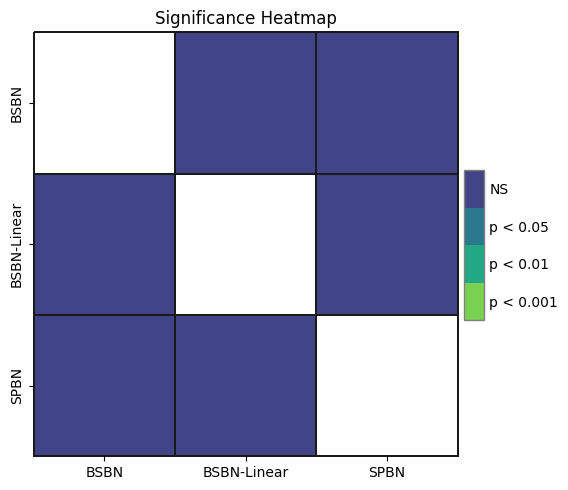

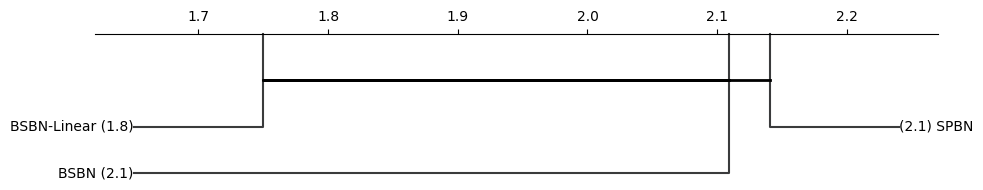

In [101]:
import scikit_posthocs as sp

plt.figure(figsize=(5, 5))
plt.title('Significance Heatmap')

# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#414487ff', '#7ad151ff' , '#22a884ff','#2a788eff' ]
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.1', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.96, 0.35, 0.04, 0.3], 'cmap': cmap}
sp.sign_plot(bergmann_psthoc, **heatmap_args)
plt.tight_layout()
plt.savefig(path+f'{metric}_significanceHM.pdf',format='pdf', bbox_inches="tight")

plt.figure(figsize=(10, 2), dpi=100)
# plt.title('Critical difference diagram of average score ranks')
sp.critical_difference_diagram(avg_rank, 
                               bergmann_psthoc,
                               text_h_margin=0.1,
                               label_props={'color': 'black', 'fontweight': None},
                                crossbar_props={'color': 'black', 'marker': None},
                                marker_props={'marker': '', 's': 50, 'color': 'k', 'edgecolor': 'k'},
                                elbow_props={'color': '#3a3b3c'},)
plt.tight_layout()
plt.savefig(path+f'{metric}_CDD_bergmann.pdf',format='pdf', bbox_inches="tight")